In [1]:
# Import out Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = r"C:\Users\asunday\OneDrive\Documents\Datasets\mall customers\Mall_Customers.csv"

df = pd.read_csv(filepath)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Feature Selection

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
# Finding the optimal number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 48)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

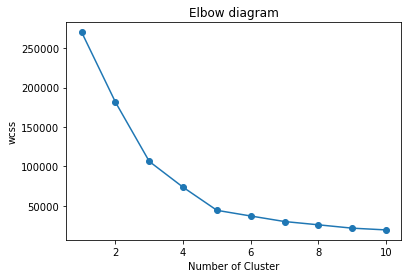

In [7]:
x=range(1, 11)
y=wcss
plt.plot(x, y, marker = 'o')
plt.title('Elbow diagram')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [8]:
optimalCluster = 5

In [9]:
# Initialize my model

kmeans = KMeans(n_clusters = optimalCluster, init = 'k-means++', random_state = 48)

y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [10]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
# add cluster to dataframe

X['Cluster'] = y_kmeans

X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


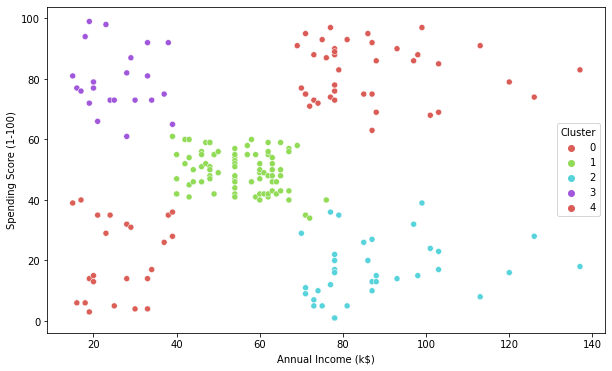

In [15]:
# Visualize our clusters

import seaborn as sns

x = 'Annual Income (k$)'
y = 'Spending Score (1-100)'

plt.figure(figsize = (10, 6))
sns.scatterplot(data = X, x = x, y = y, hue = 'Cluster', palette = 'hls')

plt.show()

In [16]:
print(kmeans.predict([[25, 80]]))

[3]
